In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

from src.data.dataset_info import datasets

dataset = datasets[0]
name = dataset.name
print("dataset: {}".format(name))
path = "./datasets/preprocessed/{}.pkl".format(name)
# graph_path = "./datasets/preprocessed/graph_{}.gexf".format(name)
df = pd.read_pickle(path)

dataset: cic_ton_iot


In [5]:
df.head()

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,...,src_pagerank,dst_pagerank,src_local_pagerank,dst_local_pagerank,src_k_core,dst_k_core,src_k_truss,dst_k_truss,src_Comm,dst_Comm
0,177.30.87.144-192.168.1.1-0-0-0,177.30.87.144,0.0,192.168.1.1,0.0,0.0,25/04/2019 05:18:52 pm,47814343.0,5.0,0.0,...,0.000002,0.000021,0.000003,0.000017,0.090909,1.000000,0.000210,0.001051,0.008988,0.463040
1,167.49.176.28-50.165.192.168-0-0-0,167.49.176.28,0.0,50.165.192.168,0.0,0.0,25/04/2019 05:18:49 pm,2033142.0,2.0,0.0,...,0.000002,0.000029,0.000004,0.000055,0.090909,0.181818,0.000210,0.000315,0.030358,0.937518
2,230.158.52.59-177.21.192.168-0-0-0,230.158.52.59,0.0,177.21.192.168,0.0,0.0,25/04/2019 05:18:37 pm,82877133.0,14.0,0.0,...,0.000002,0.000709,0.000004,0.001335,0.090909,0.363636,0.000210,0.000526,0.028645,0.997455
3,183.68.192.168-1.1.192.168-0-0-0,183.68.192.168,0.0,1.1.192.168,0.0,0.0,25/04/2019 05:18:42 pm,24359.0,2.0,0.0,...,0.000002,0.061140,0.000004,0.019560,0.363636,0.818182,0.000420,0.000631,0.027196,0.230291
4,183.41.192.168-1.1.192.168-0-0-0,183.41.192.168,0.0,1.1.192.168,0.0,0.0,25/04/2019 05:18:42 pm,10239351.0,3.0,0.0,...,0.000002,0.061140,0.000004,0.019560,0.636364,0.818182,0.000526,0.000631,0.050564,0.230291


In [6]:
df.reset_index(inplace=True, drop = True)

df.reset_index(inplace=True)


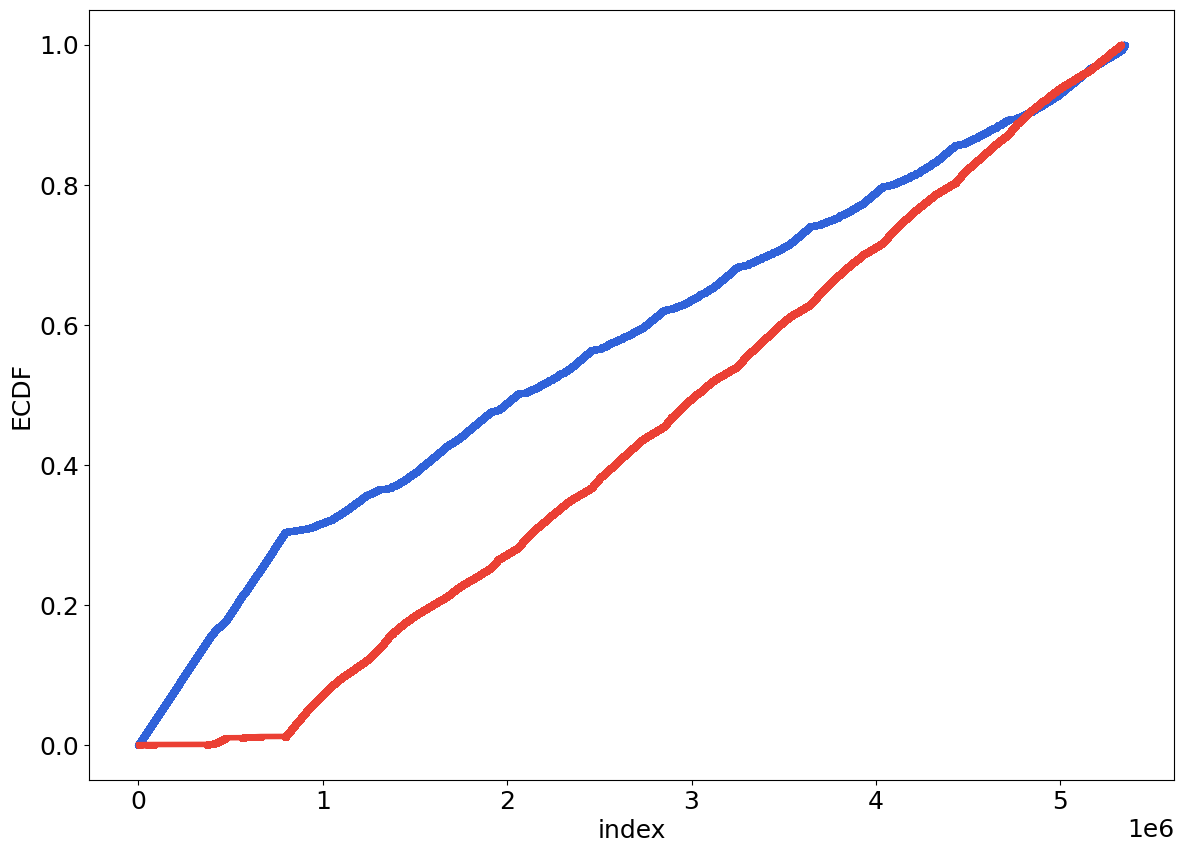

src_betweenness


<Figure size 640x480 with 0 Axes>

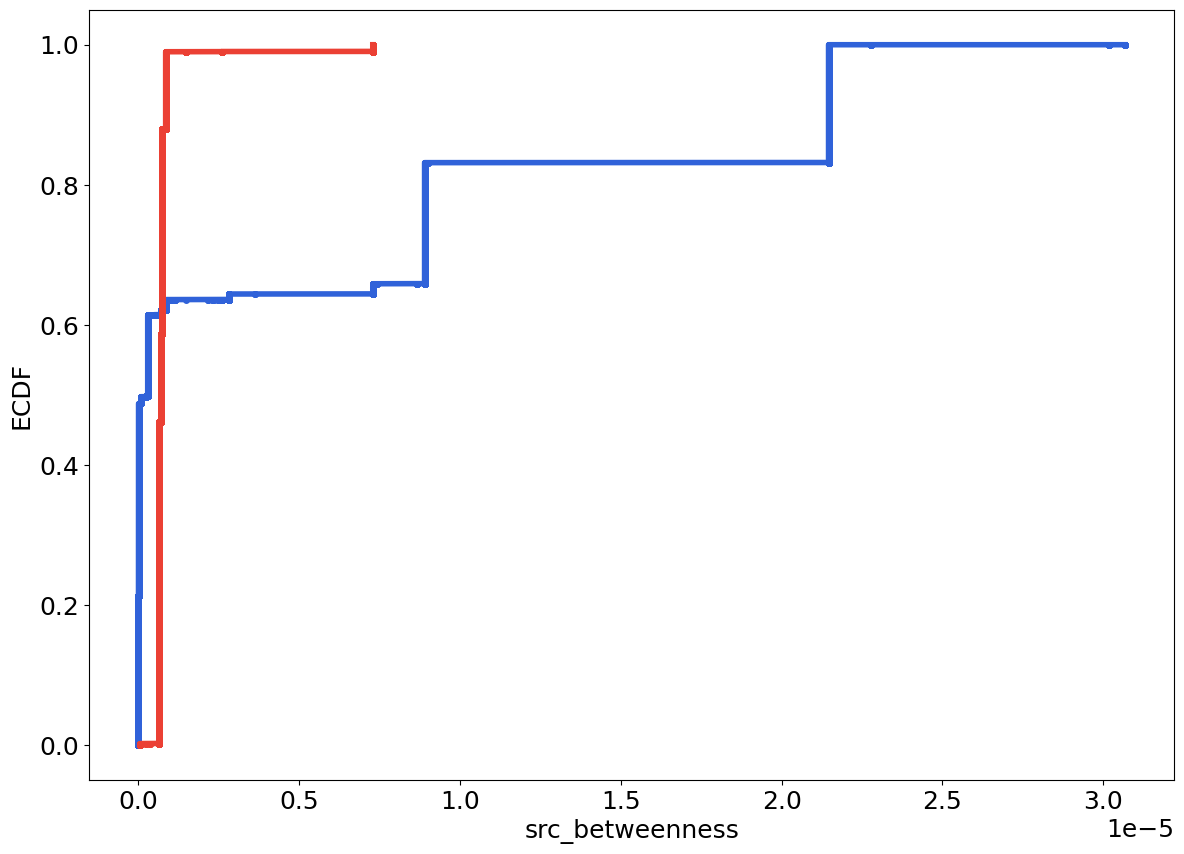

dst_betweenness


<Figure size 640x480 with 0 Axes>

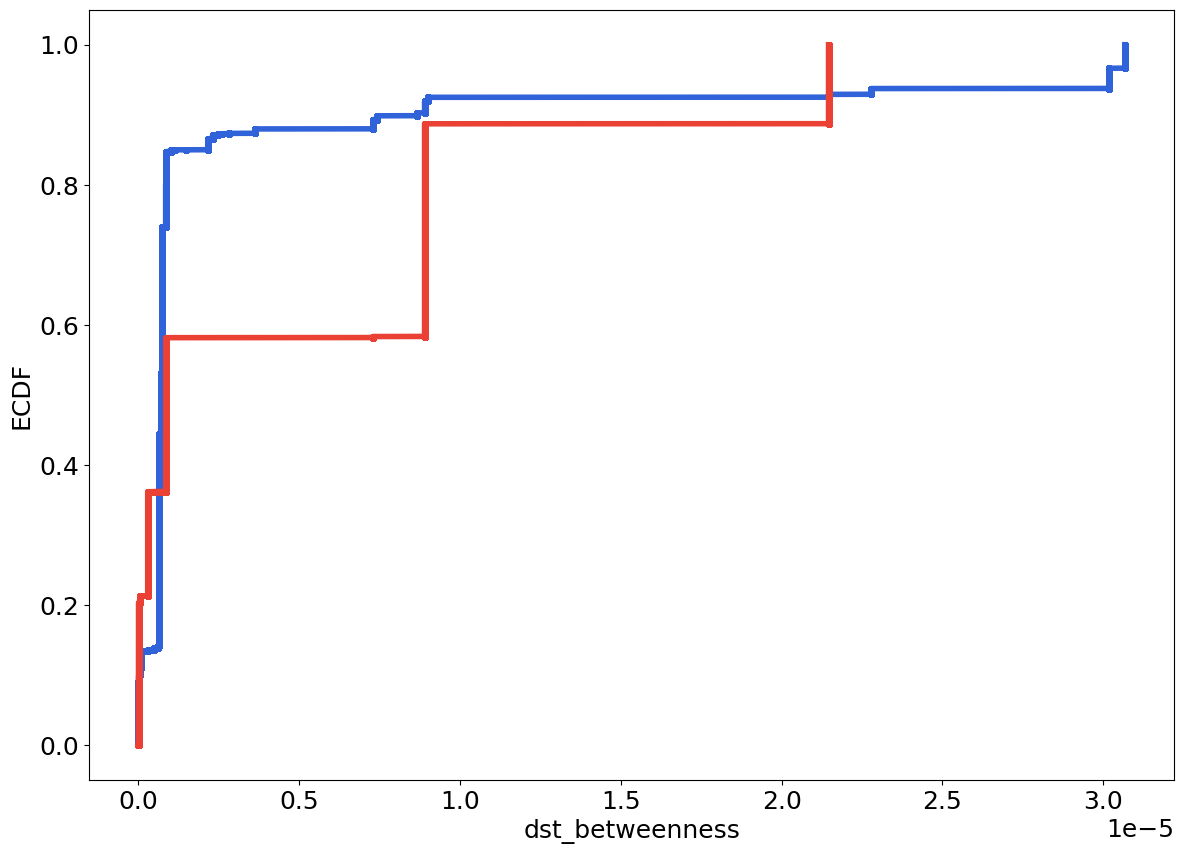

src_local_betweenness


<Figure size 640x480 with 0 Axes>

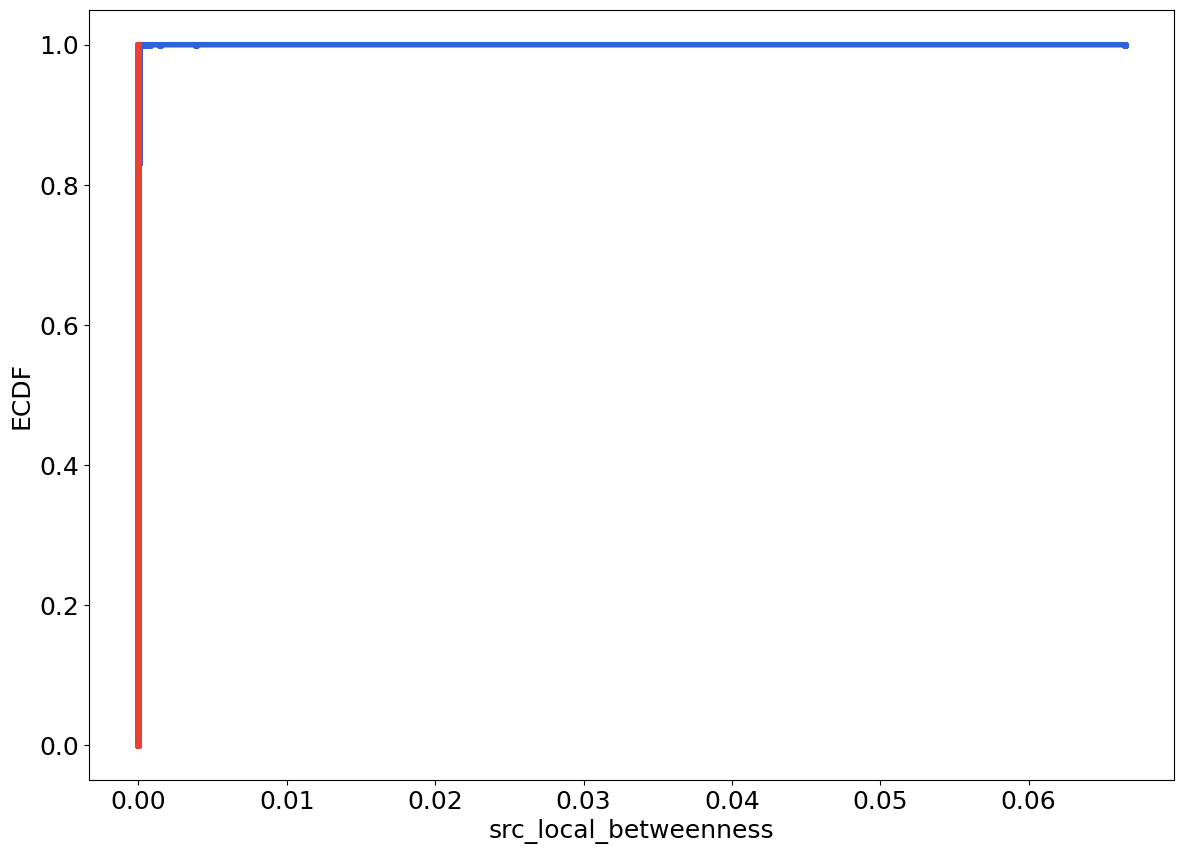

dst_local_betweenness


<Figure size 640x480 with 0 Axes>

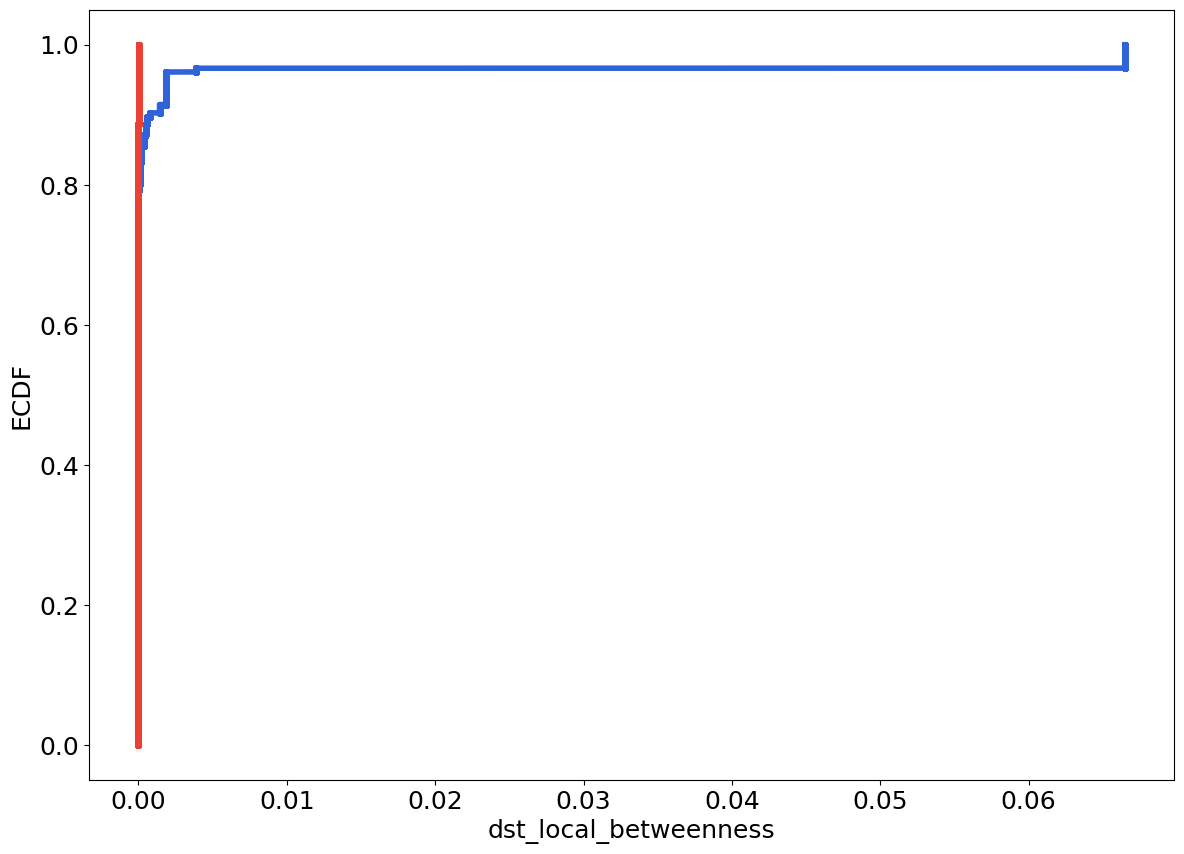

src_degree


<Figure size 640x480 with 0 Axes>

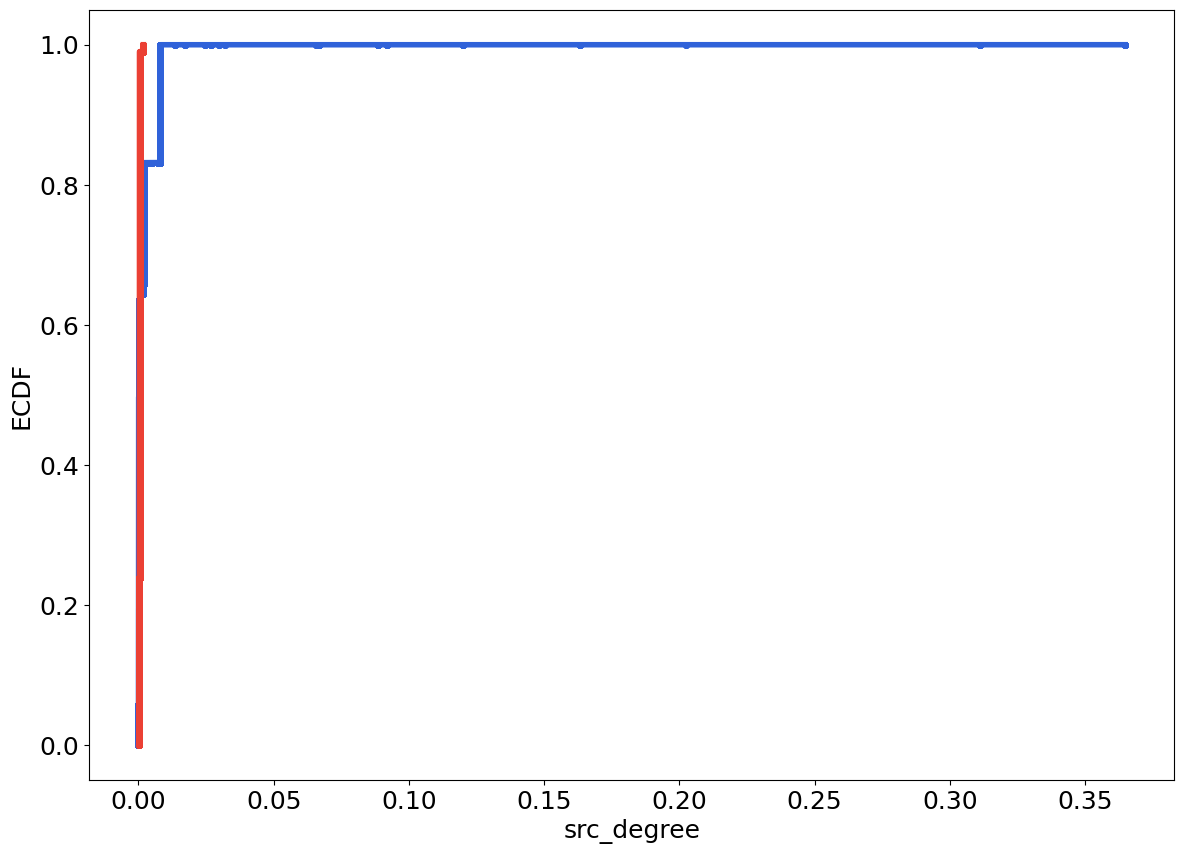

dst_degree


<Figure size 640x480 with 0 Axes>

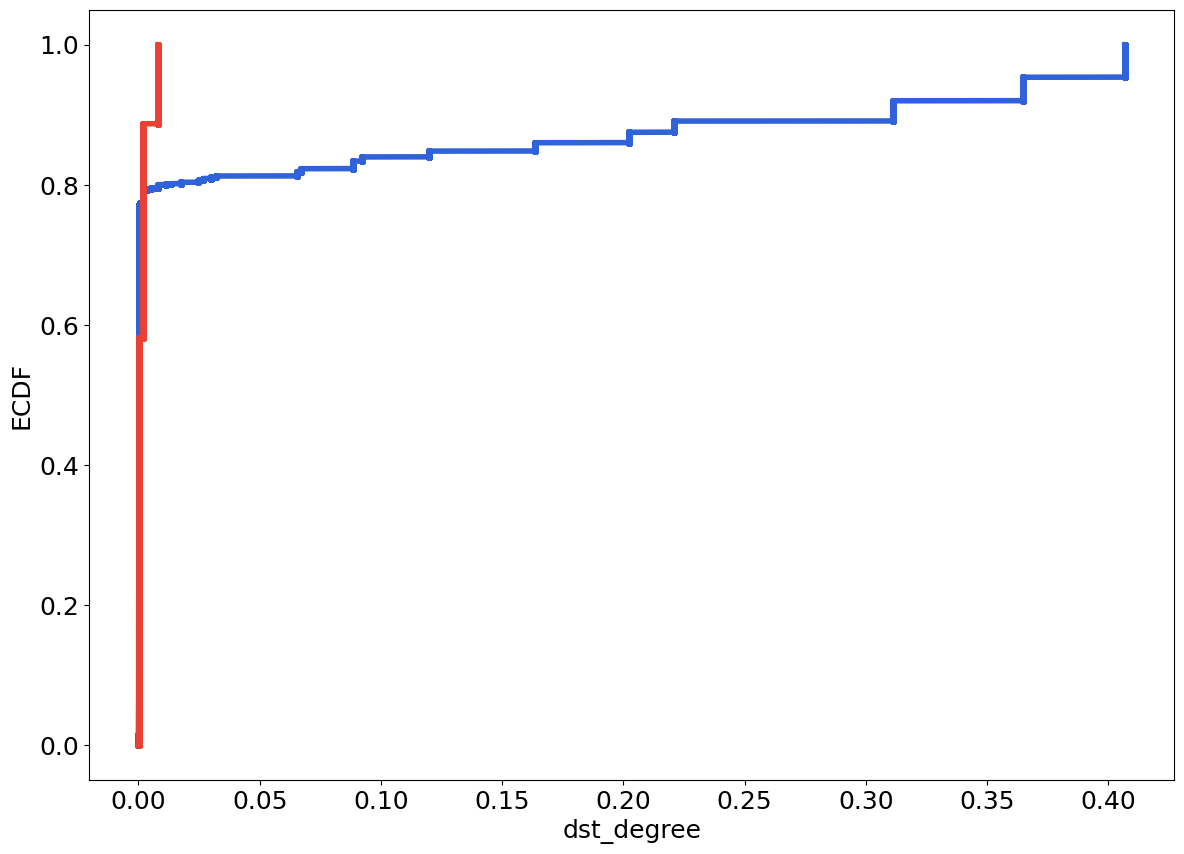

src_local_degree


<Figure size 640x480 with 0 Axes>

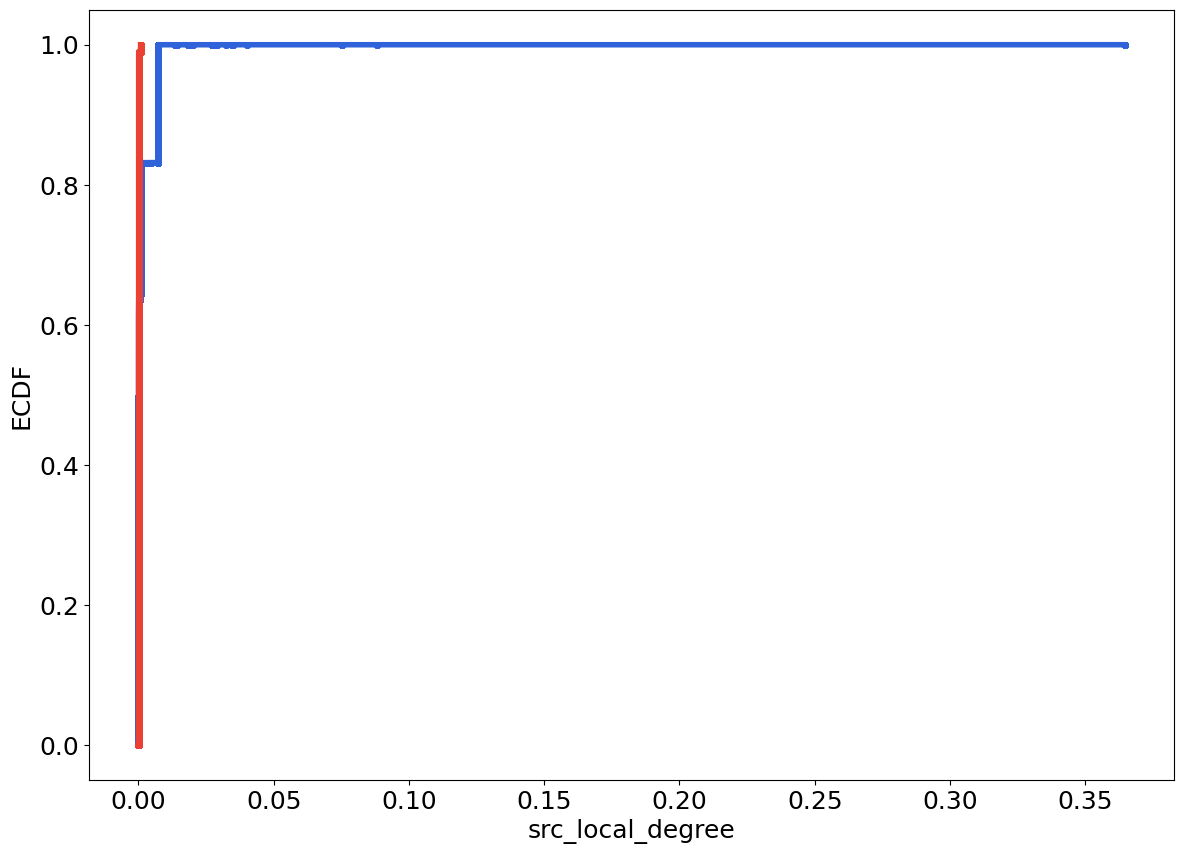

dst_local_degree


<Figure size 640x480 with 0 Axes>

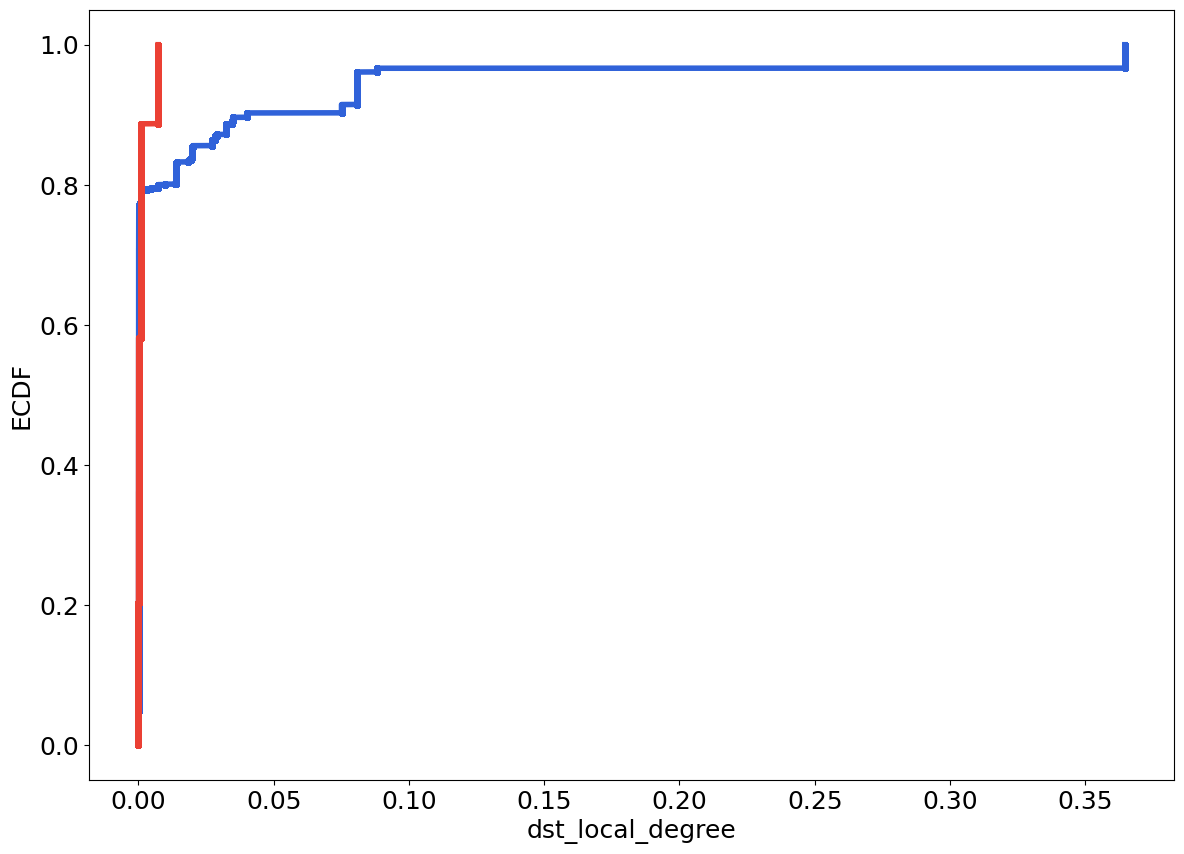

src_eigenvector


<Figure size 640x480 with 0 Axes>

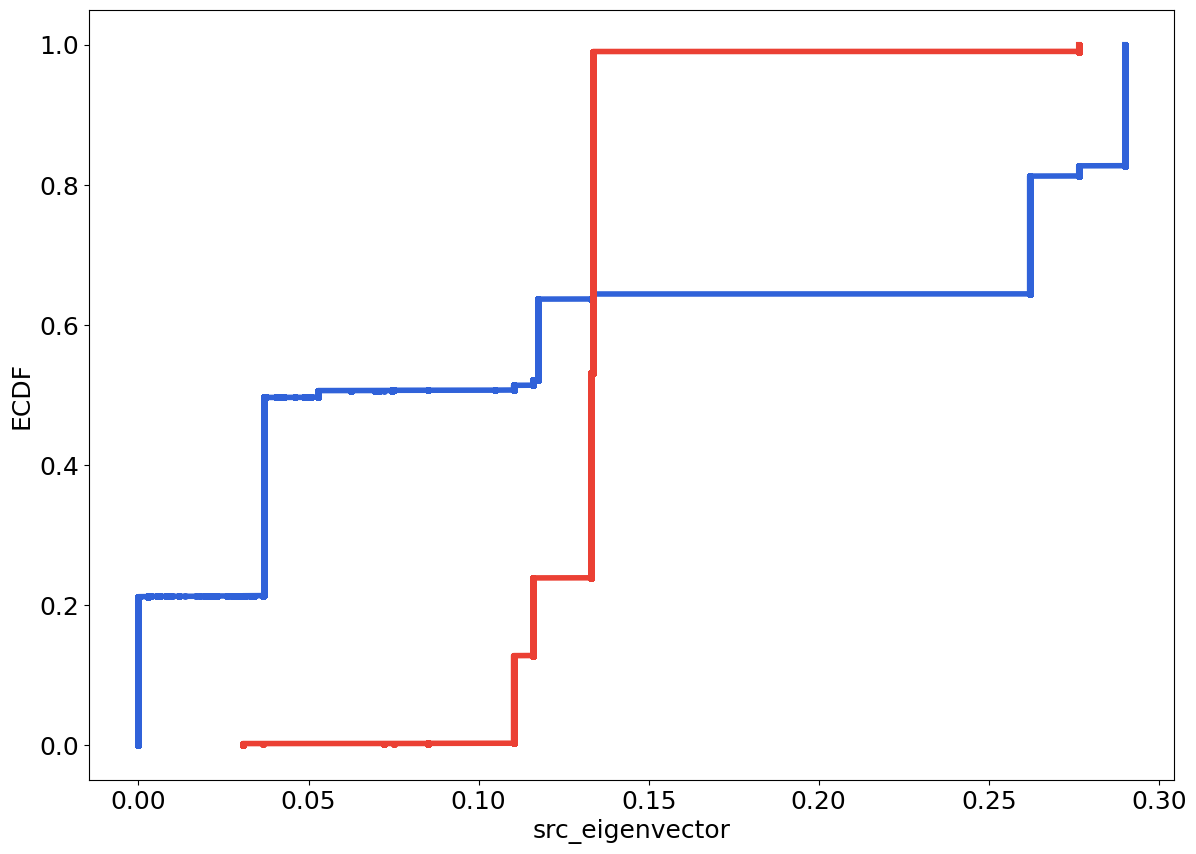

dst_eigenvector


<Figure size 640x480 with 0 Axes>

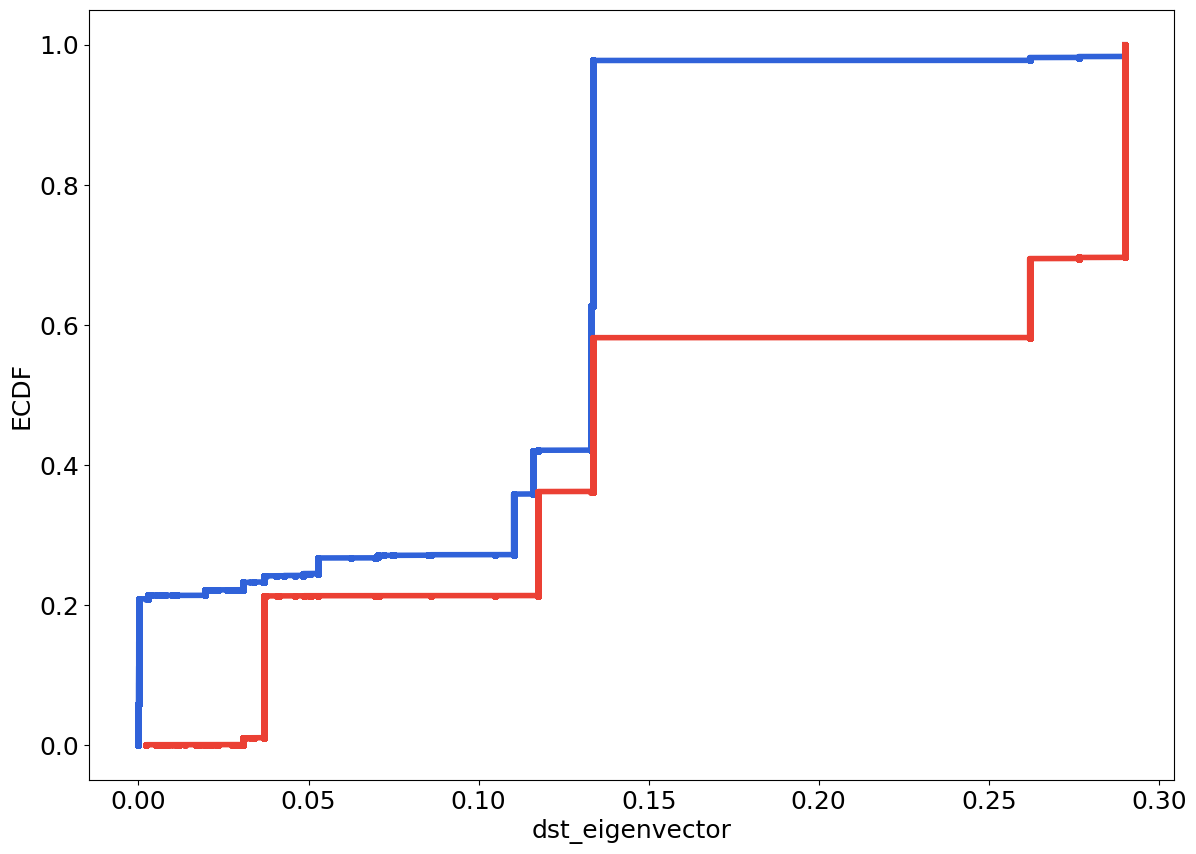

src_closeness


<Figure size 640x480 with 0 Axes>

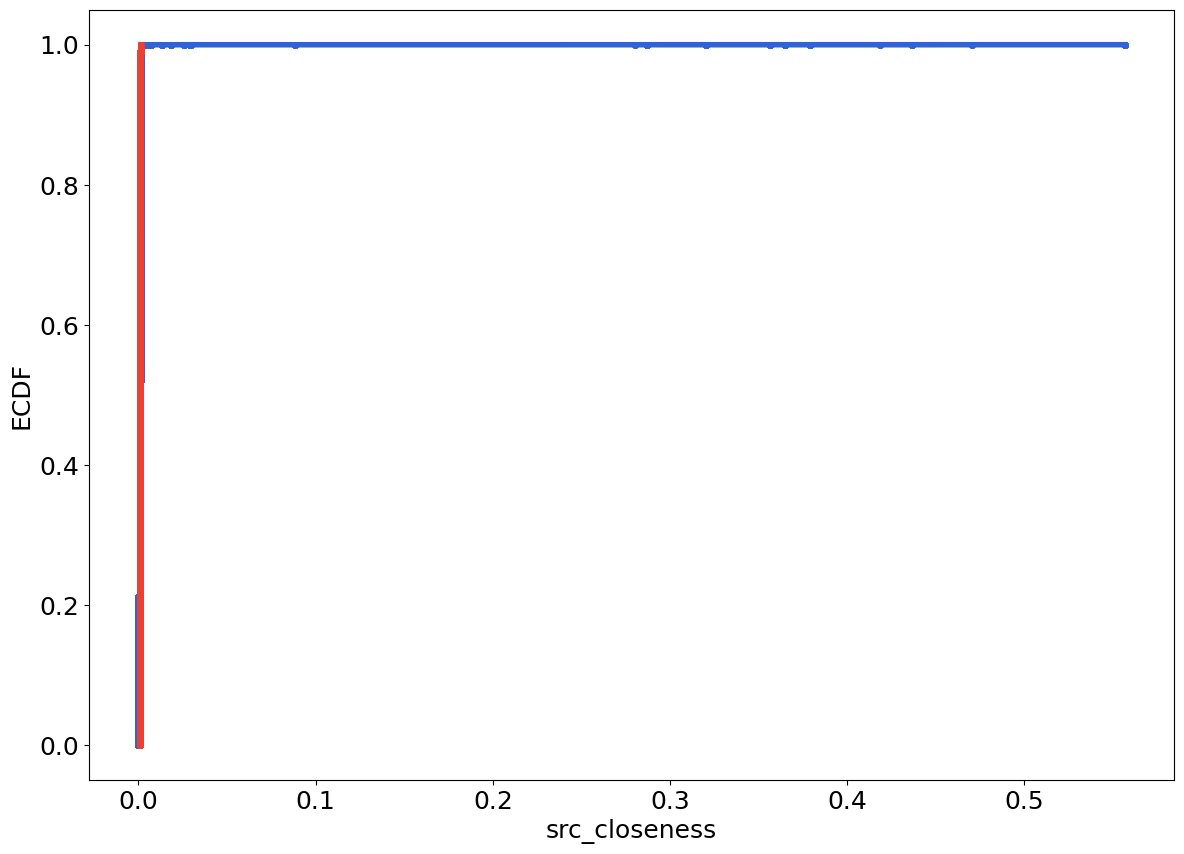

dst_closeness


<Figure size 640x480 with 0 Axes>

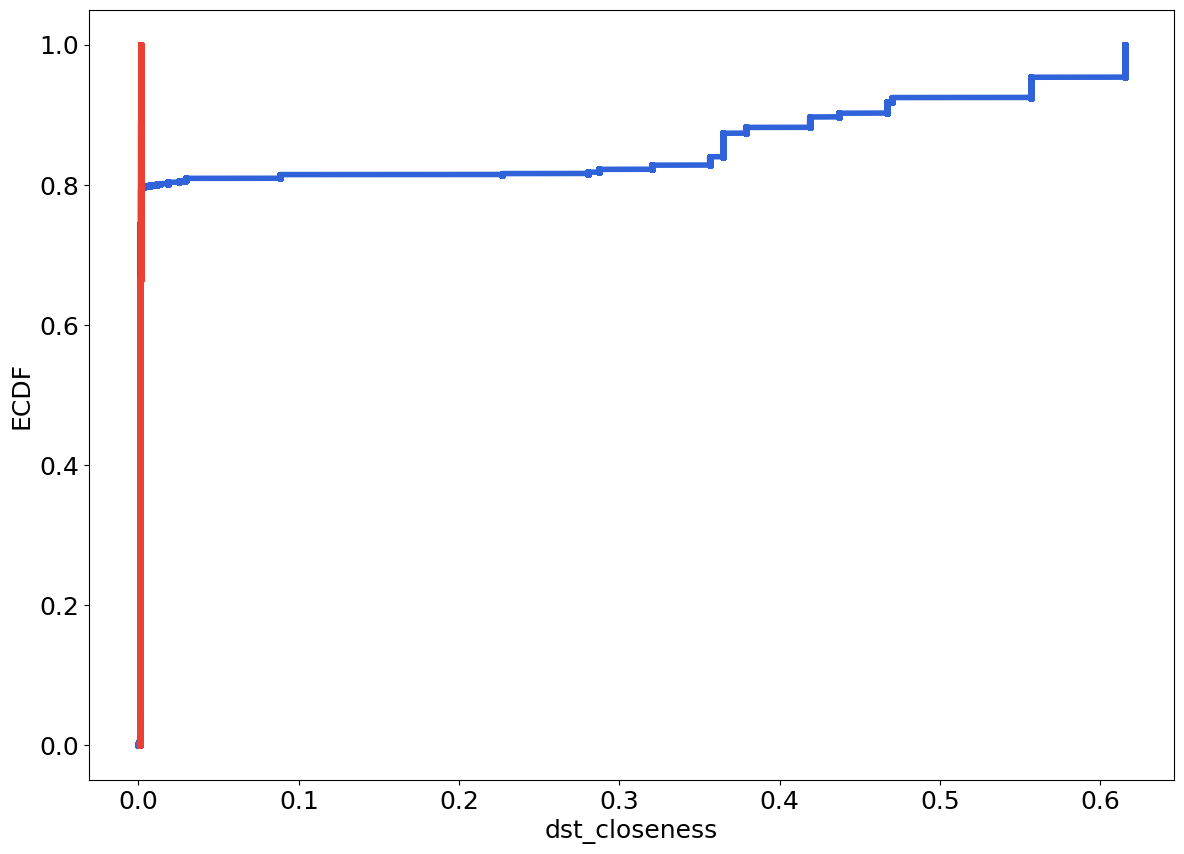

src_pagerank


<Figure size 640x480 with 0 Axes>

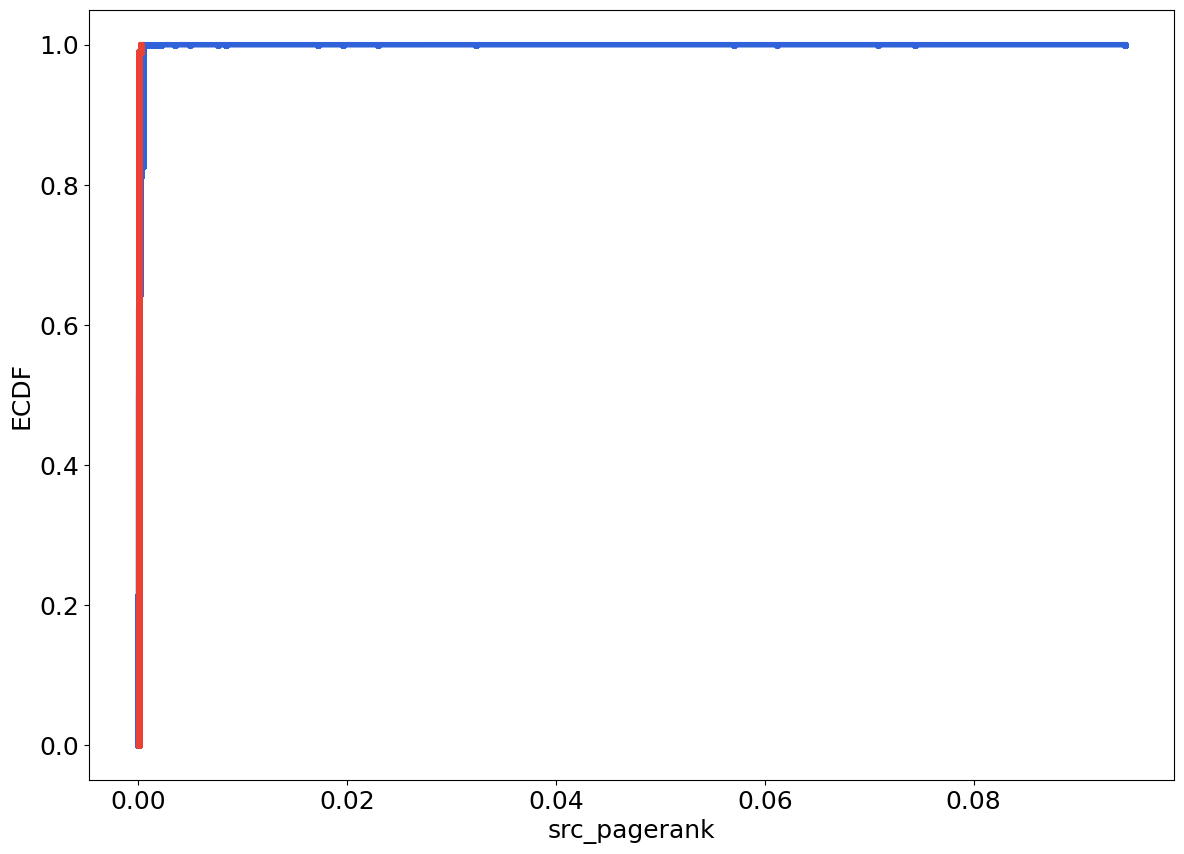

dst_pagerank


<Figure size 640x480 with 0 Axes>

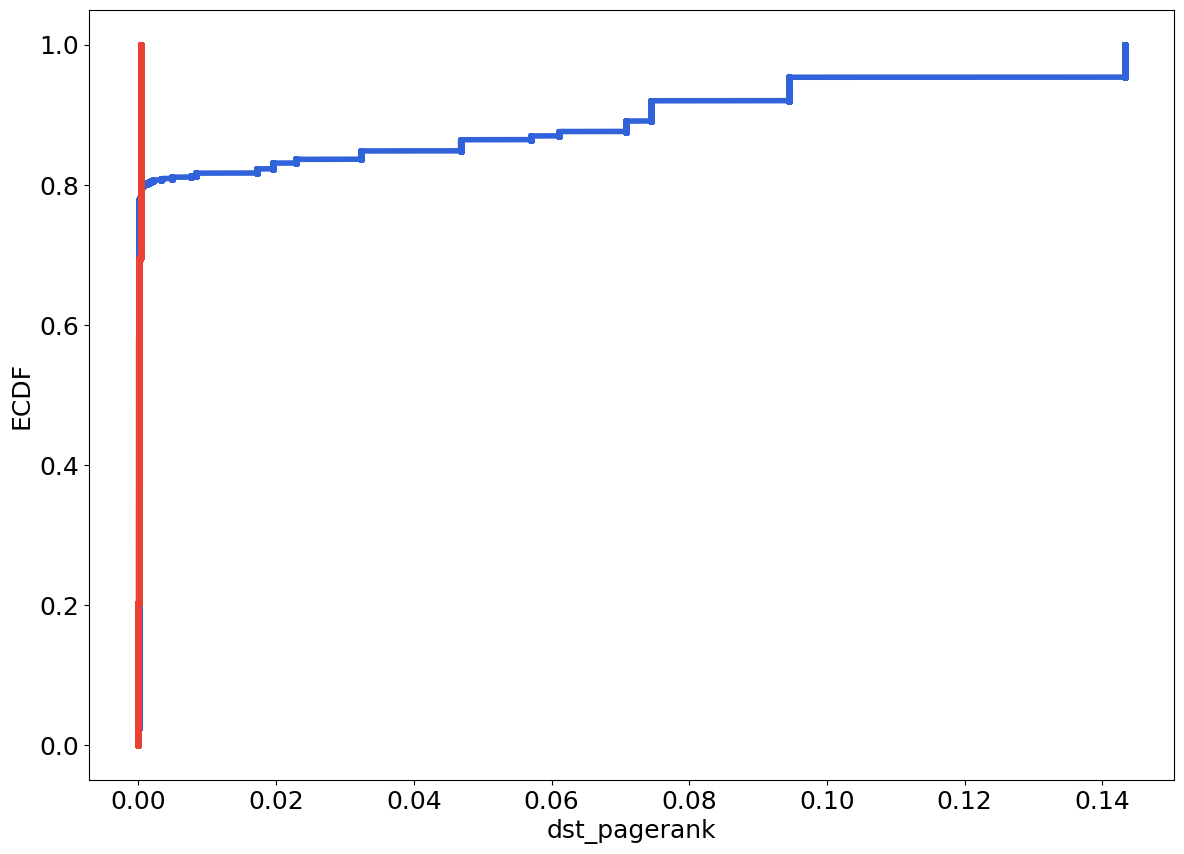

src_local_pagerank


<Figure size 640x480 with 0 Axes>

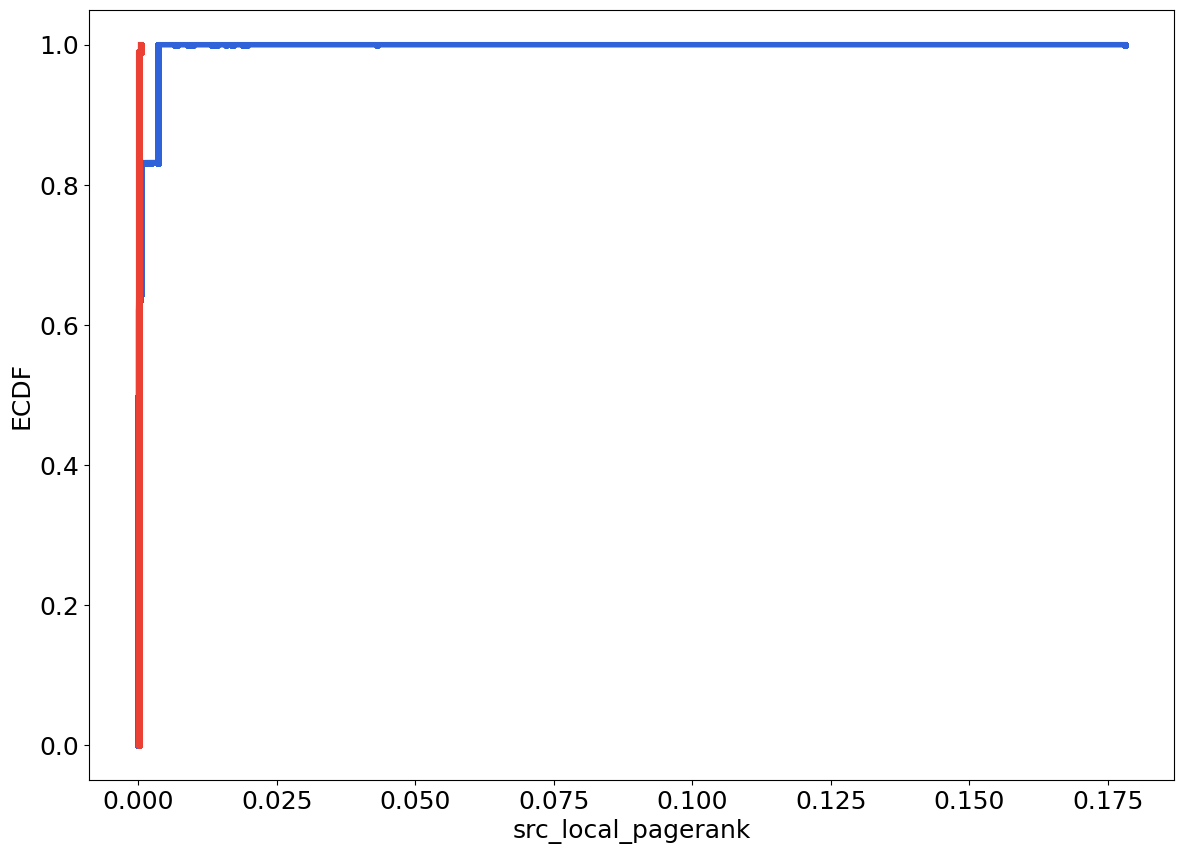

dst_local_pagerank


<Figure size 640x480 with 0 Axes>

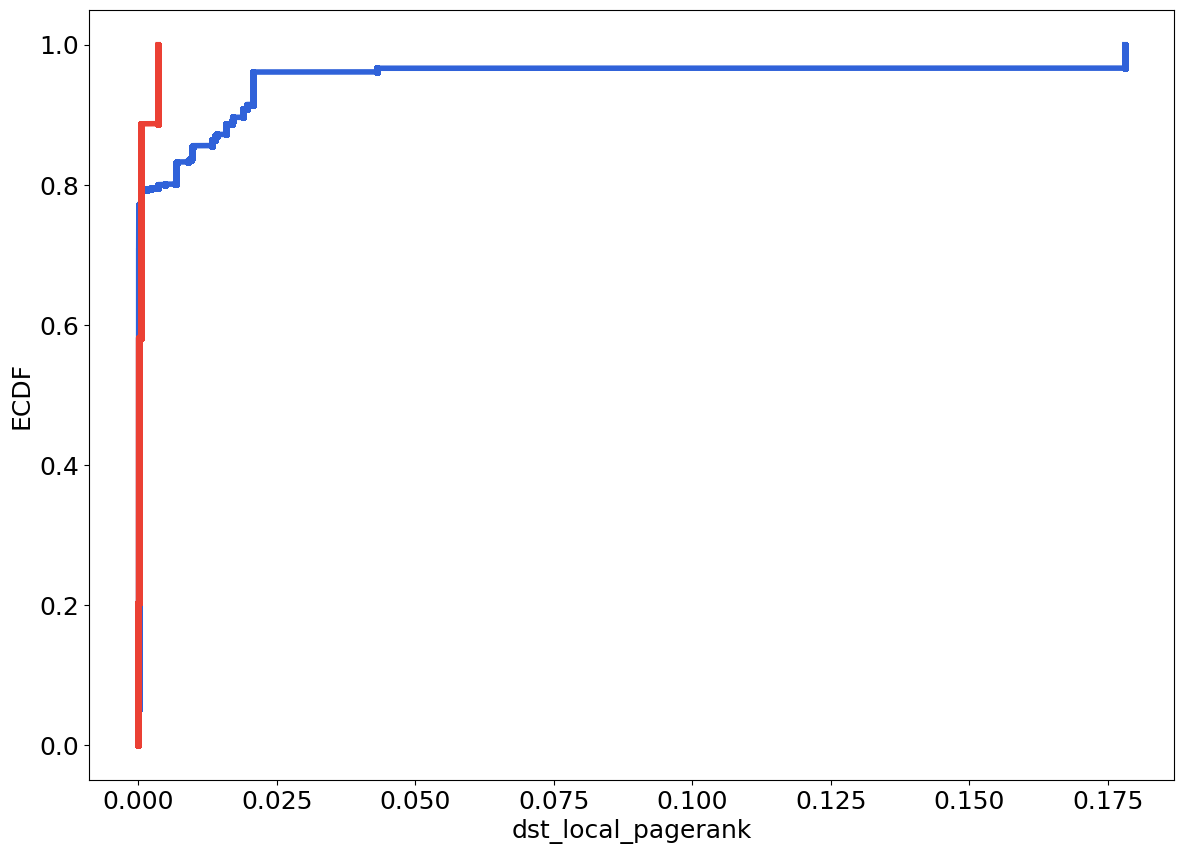

src_k_core


<Figure size 640x480 with 0 Axes>

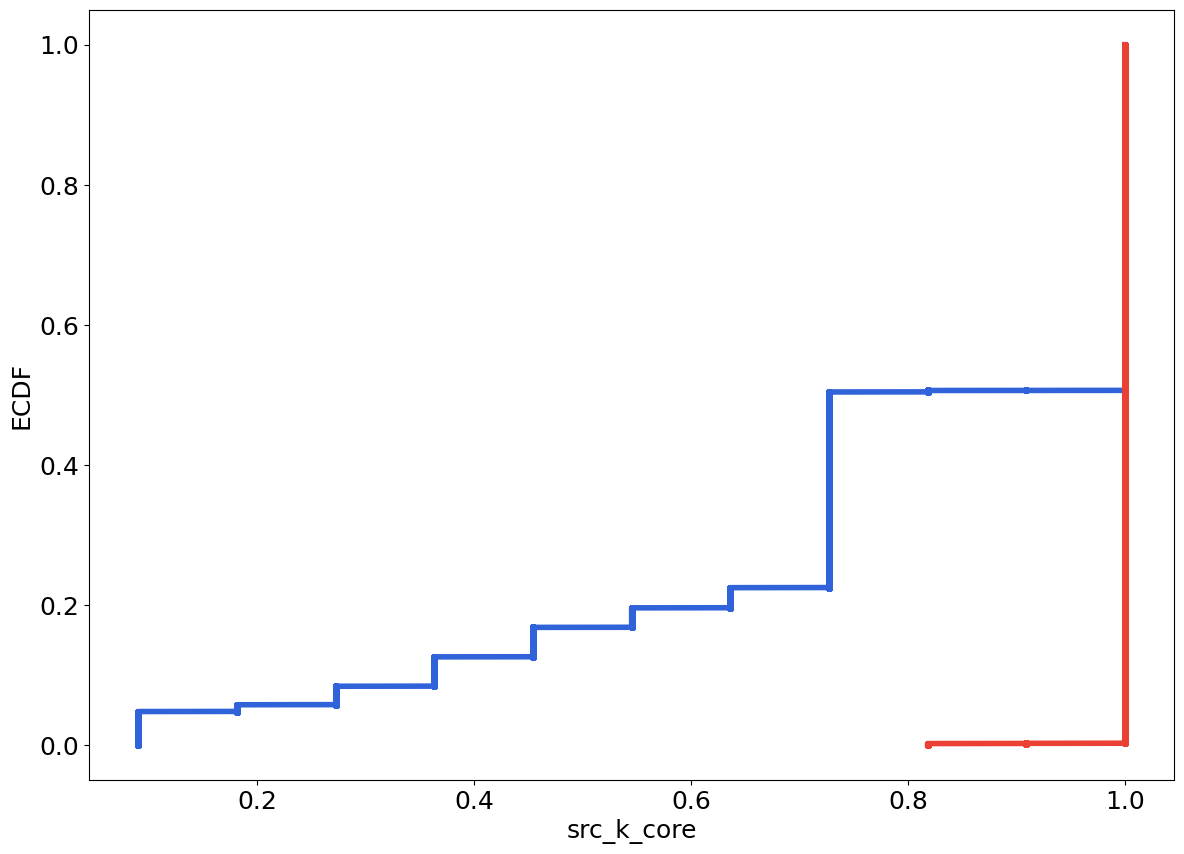

dst_k_core


<Figure size 640x480 with 0 Axes>

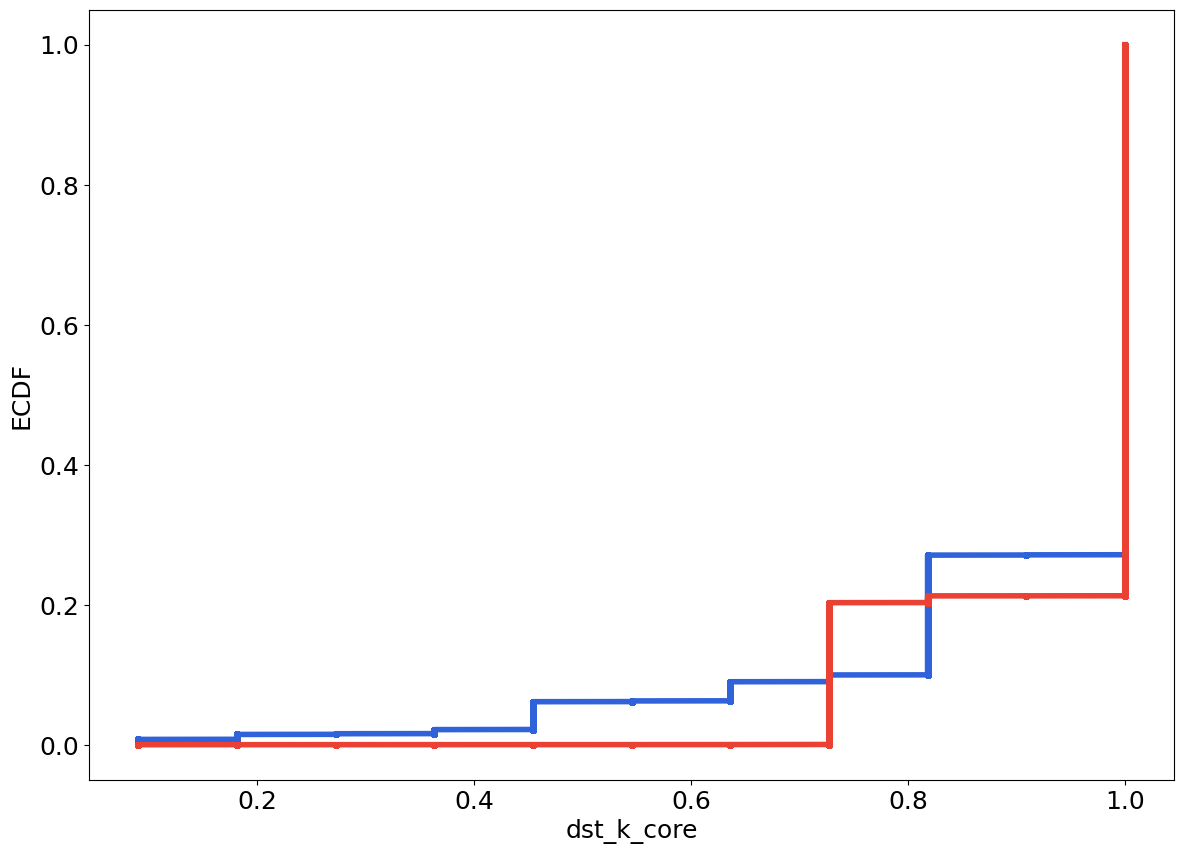

src_k_truss


<Figure size 640x480 with 0 Axes>

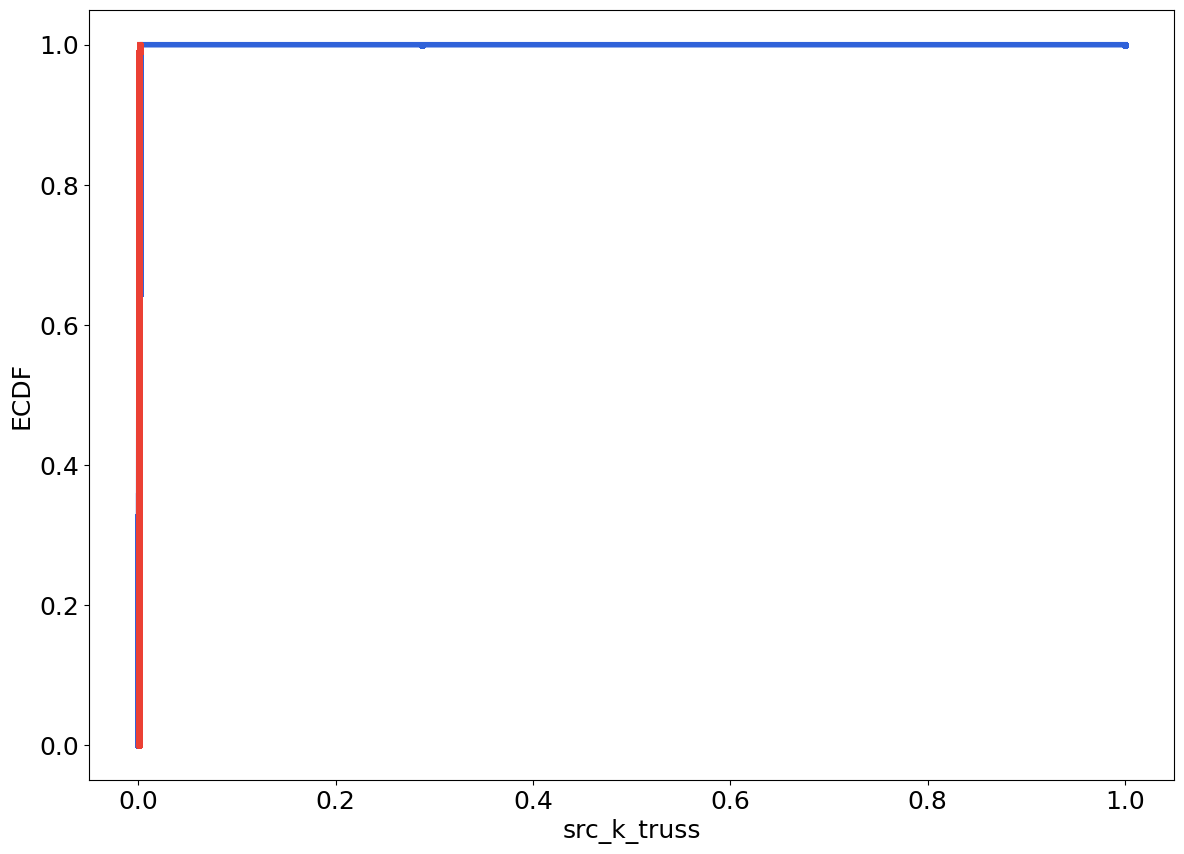

dst_k_truss


<Figure size 640x480 with 0 Axes>

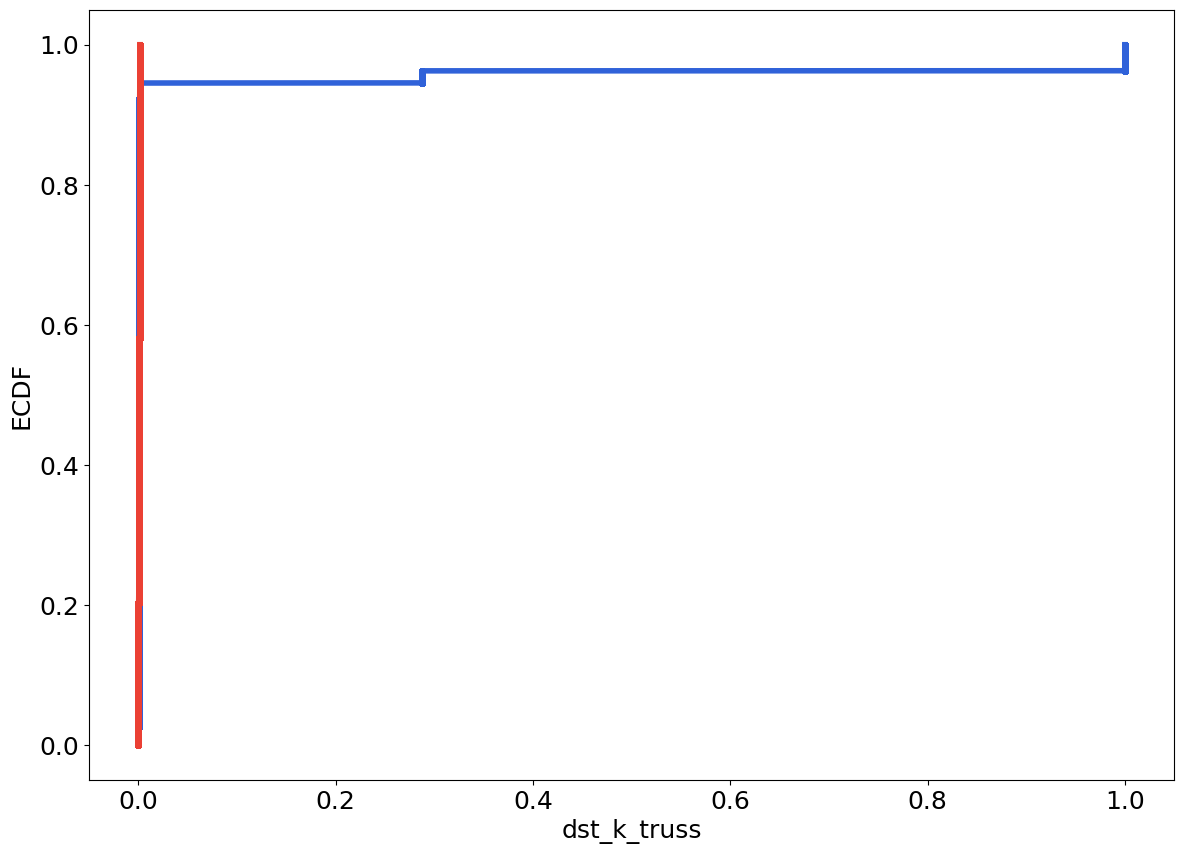

src_Comm


<Figure size 640x480 with 0 Axes>

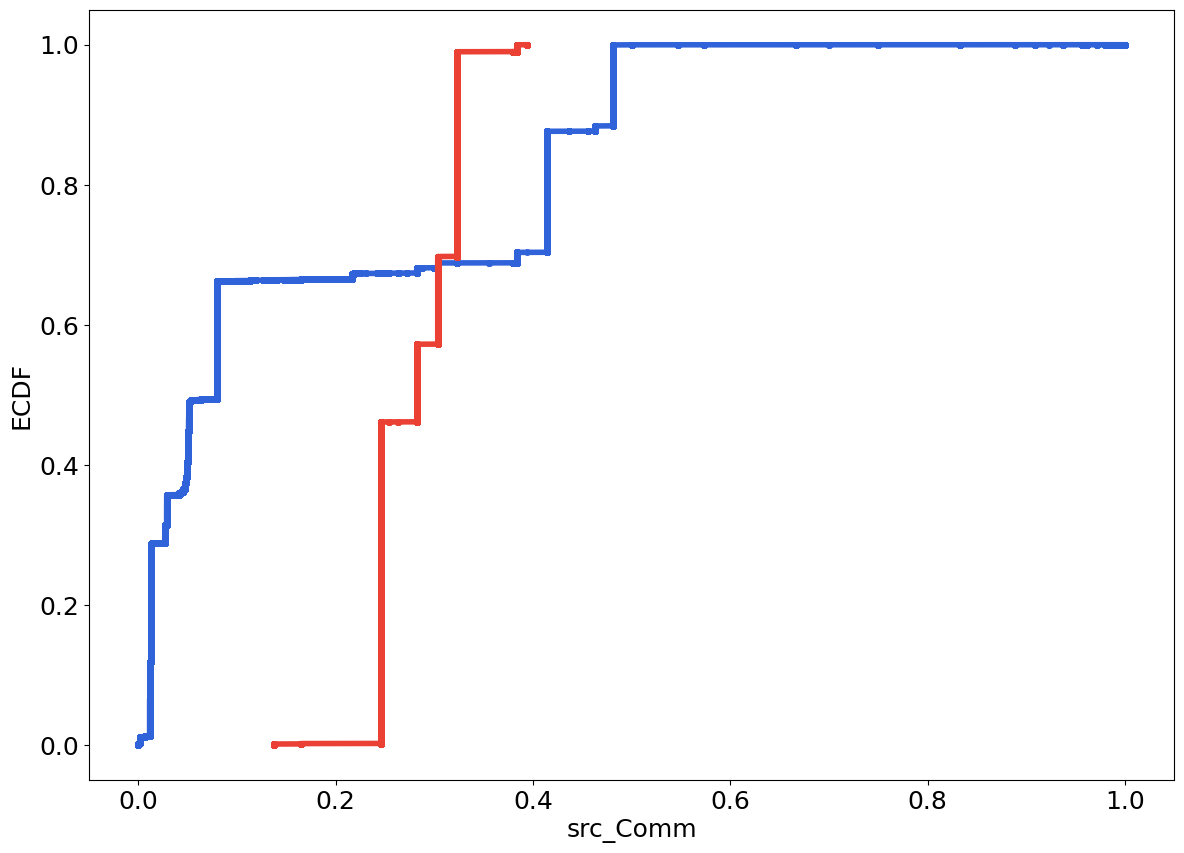

dst_Comm


<Figure size 640x480 with 0 Axes>

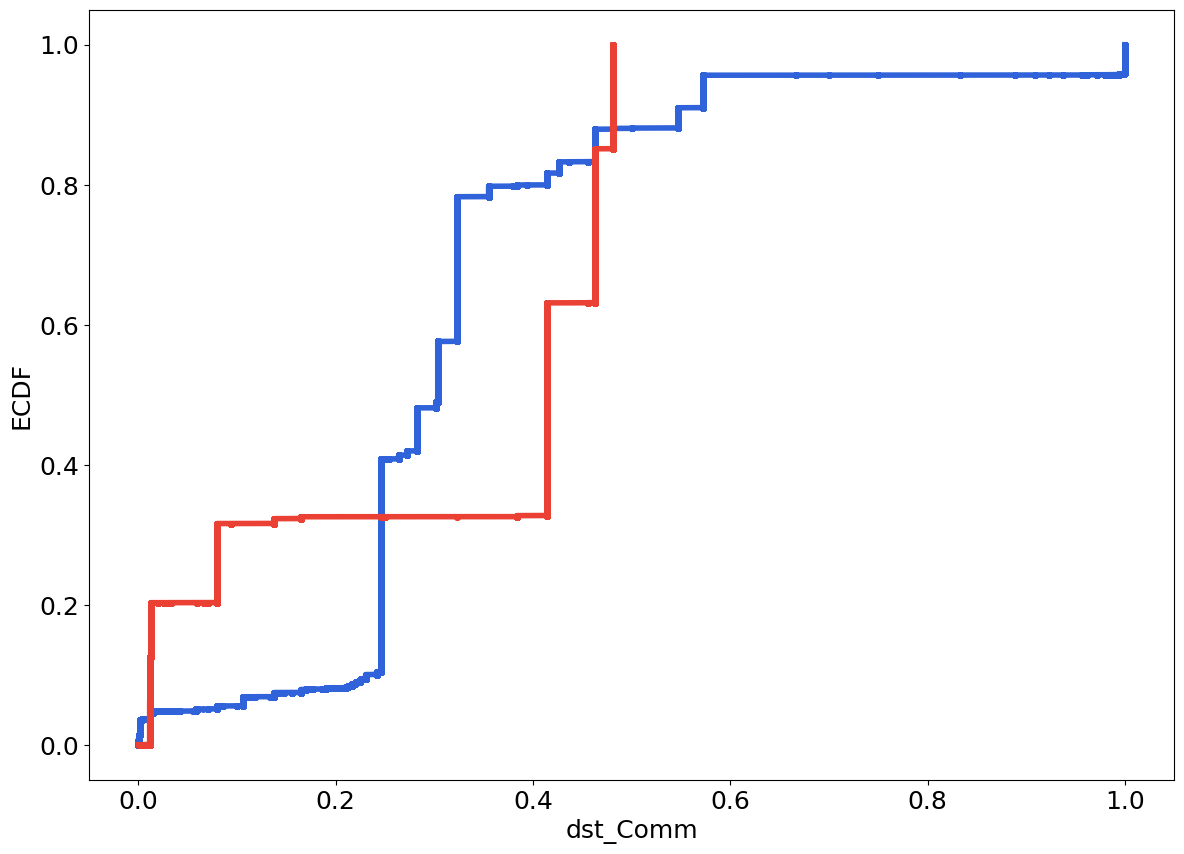

In [7]:
graph_path = "./datasets/preprocessed/graph_{}.gexf".format(name)

G = nx.read_gexf(graph_path)

# Calculate the ECDF
def ecdf(data):
    x = np.sort(data)
    y = np.arange(1, len(data) + 1) / len(data)
    return x, y




plt.figure(figsize=(14, 10))
plt.rcParams['font.size'] = 18
data_column1 = df[df[dataset.label_col] == 0]["index"]
data_column2 = df[df[dataset.label_col] == 1]["index"]
# Compute ECDF
x1, y1 = ecdf(data_column1)
x2, y2 = ecdf(data_column2)

# Plot the ECDF
plt.plot(x1, y1, color="#3062d9", linewidth=4, marker='o', markersize=4)
plt.plot(x2, y2, color="#eb4034", linewidth=4, marker='o', markersize=4)
plt.xlabel('index')
plt.ylabel('ECDF')
# plt.title('Empirical Cumulative Distribution Function (ECDF)')

# Show the plot
plt.show()


for feature in dataset.network_features:
    print(feature)

    plt.clf()
    plt.figure(figsize=(14, 10))
    plt.rcParams['font.size'] = 18
    data_column1 = df[df[dataset.label_col] == 0][feature]
    data_column2 = df[df[dataset.label_col] == 1][feature]
    # Compute ECDF
    x1, y1 = ecdf(data_column1)
    x2, y2 = ecdf(data_column2)
    
    # Plot the ECDF
    plt.plot(x1, y1, color="#3062d9", linewidth=4, marker='o', markersize=4)
    plt.plot(x2, y2, color="#eb4034", linewidth=4, marker='o', markersize=4)
    plt.xlabel(feature)
    plt.ylabel('ECDF')
    # plt.title('Empirical Cumulative Distribution Function (ECDF)')
    
    # Show the plot
    plt.show()

